In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import mglearn

# create a synthetic dataset
X, y = make_blobs(random_state=0)

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate a model and fit it to the training set
logistics_regression = LogisticRegression().fit(X_train, y_train)

# evaluate the model on the test set
print("Test set score: {:.2f}".format(logistics_regression.score(X_test, y_test)))

Test set score: 0.88


## Cross-Validation

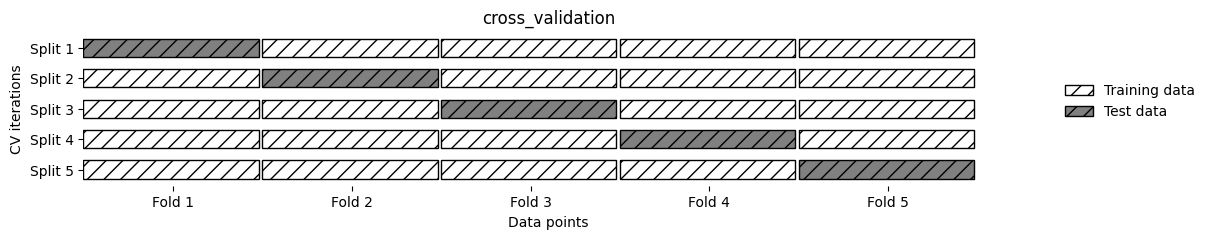

In [2]:
mglearn.plots.plot_cross_validation()

### Cross-Validation in scikit-learn

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logistic_regression = LogisticRegression(max_iter=1000)

scores = cross_val_score(logistic_regression, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98 0.96 0.98]


In [4]:
scores = cross_val_score(logistic_regression, iris.data, iris.target)
print("Cross-validation score: {}".format(scores))

Cross-validation score: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
print("Average cross-validation score: {:.3f}".format(scores.mean()))

Average cross-validation score: 0.973


## Stratified k-Fold Cross-Validation and Other Strategies

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


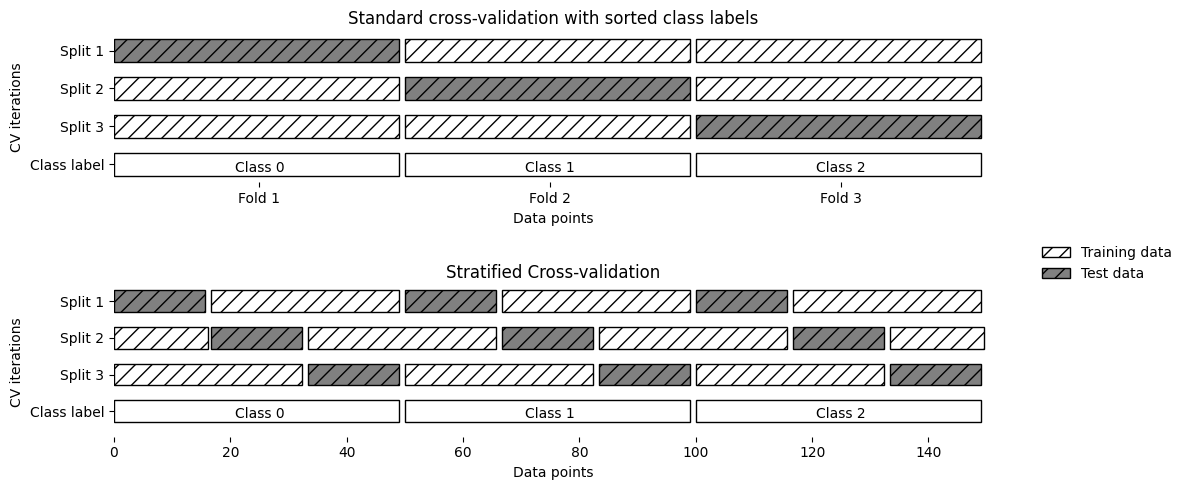

In [7]:
mglearn.plots.plot_stratified_cross_validation()

### More control over cross-validation

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [9]:
print("Cross-validation scores:\n{}".format(cross_val_score(logistic_regression, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [10]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logistic_regression, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [11]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logistic_regression, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


### Leave-one-out cross-validation

In [12]:
from sklearn.model_selection import LeaveOneOut
leave_one_out = LeaveOneOut()
scores = cross_val_score(logistic_regression, iris.data, iris.target, cv=leave_one_out)
print("Number of cv itrerations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv itrerations:  150
Mean accuracy: 0.97


### Shuffle-split cross-validation

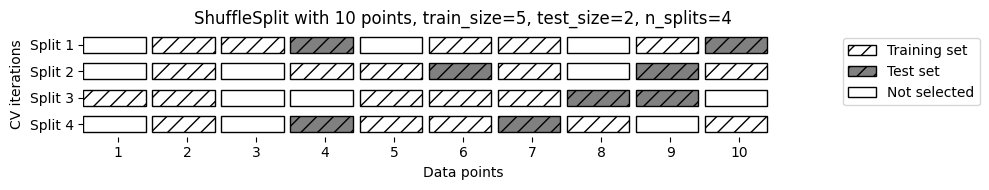

In [13]:
mglearn.plots.plot_shuffle_split()


In [14]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logistic_regression, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.97333333 0.96       0.98666667 0.96       0.96       0.92
 0.98666667 0.97333333 0.94666667 0.97333333]


### Cross-validation with groups

In [15]:
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# assume the first three samples belong the the same group then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logistic_regression, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


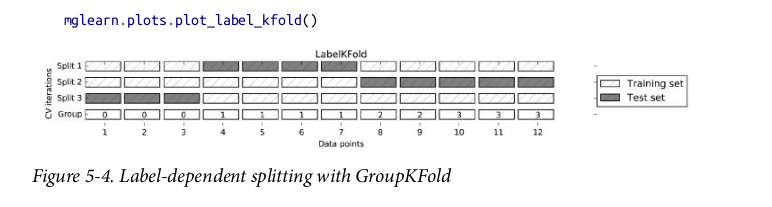

## Grid Search

## Simple Grid Search

In [16]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}     size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)

        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

print("Best Score: {:.2f}".format(best_score))
print("Best Parameters: {}".format(best_parameters))

Size of training set: 112     size of test set: 38
Best Score: 0.97
Best Parameters: {'C': 100, 'gamma': 0.001}


## The Danger of Overfitting the Parameters and the Validation Set

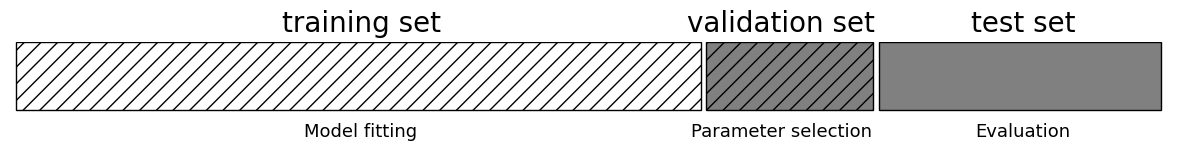

In [17]:
mglearn.plots.plot_threefold_split()

In [18]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split train+validation set into training and calidation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}     size of validation set: {}      size of test set: {}\n".format(X_train.shape[0], X_validation.shape[0], X_test.shape[0]))


best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_validation, y_validation)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}  

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84     size of validation set: 28      size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation

In [19]:
import numpy as np

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)

        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

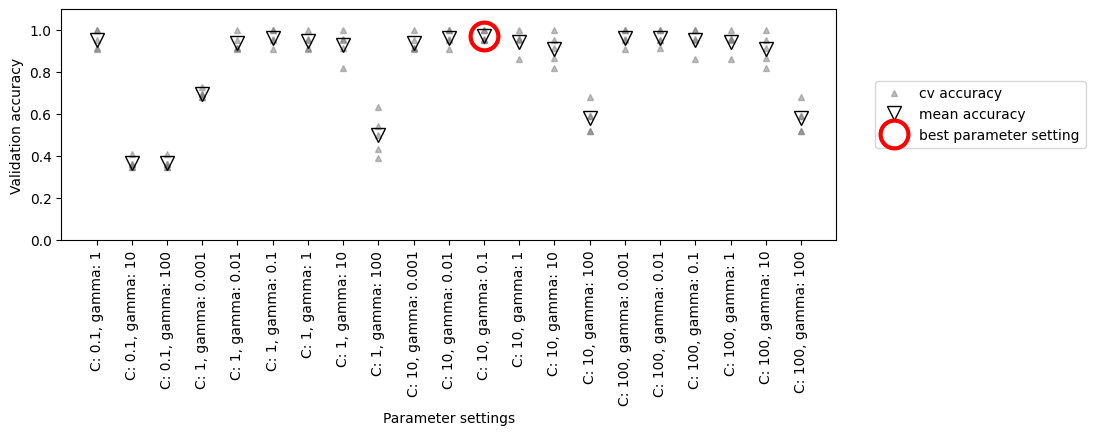

In [20]:
mglearn.plots.plot_cross_val_selection()

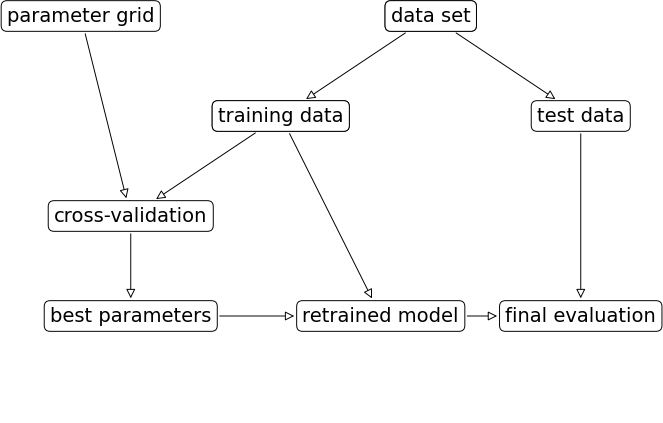

In [21]:
mglearn.plots.plot_grid_search_overview()

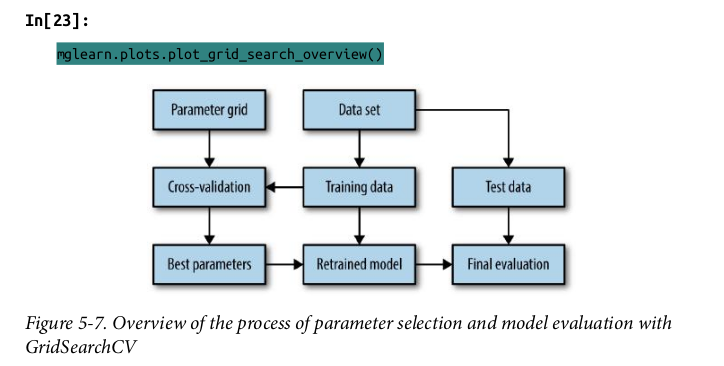

In [22]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
              "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid=param_grid, cv=5)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [26]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [27]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [28]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [29]:
from pprint import pprint
pprint(grid_search.best_estimator_.get_params())

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [30]:
import pandas as pd


# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001801,0.000400,0.001402,0.000491,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001201,0.000401,0.001200,0.000748,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.001201,0.000399,0.001001,0.000001,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.001801,0.000401,0.001202,0.000401,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.001201,0.000401,0.000801,0.000400,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


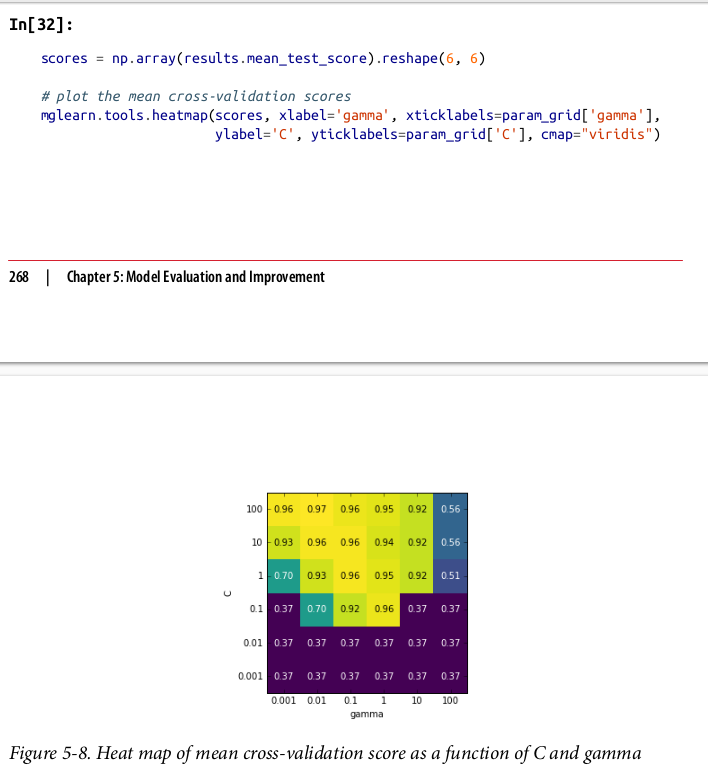

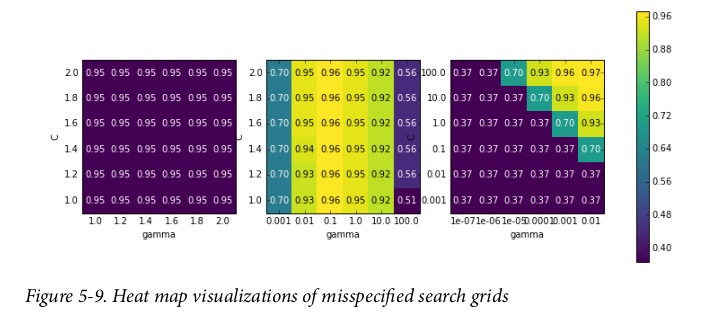

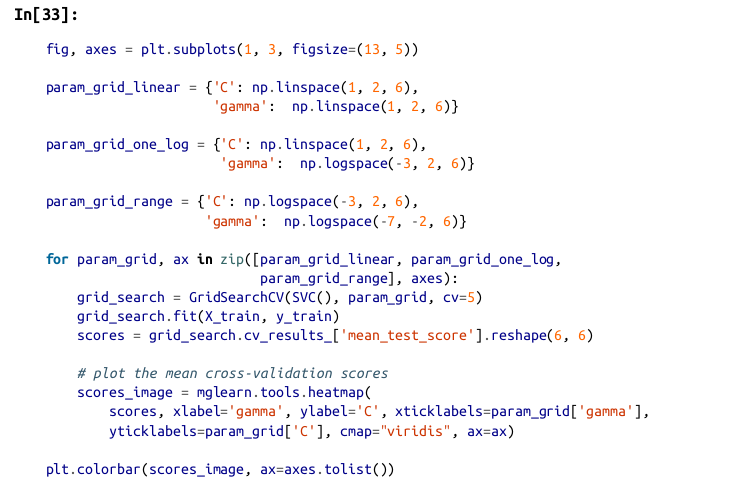

In [31]:
param_grid = [{"kernel": ["rbf"],
               "C": [0.001, 0.01, 0.1, 1, 10, 100]},
               {"kernel": ["linear"],
                "C": [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [32]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [33]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.001,0.001201,0.000401,0.000801,0.000601,0.0006,0.000801,0.000801,0.0004,0.000801,0.000801,0.000601
std_fit_time,0.000633,0.000401,0.000491,0.000401,0.000491,0.00049,0.0004,0.0004,0.00049,0.0004,0.0004,0.000491
mean_score_time,0.0006,0.000601,0.0008,0.0006,0.0004,0.000801,0.000601,0.000601,0.000601,0.0004,0.0004,0.0006
std_score_time,0.00049,0.00049,0.0004,0.00049,0.00049,0.0004,0.00049,0.00049,0.00049,0.00049,0.000491,0.00049
param_C,0.001,0.01,0.1,1.0,10.0,100.0,0.001,0.01,0.1,1.0,10.0,100.0
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'kernel': 'rbf'}","{'C': 1, 'kernel': 'rbf'}","{'C': 10, 'kernel': 'rbf'}","{'C': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.869565,1.0,1.0,1.0,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.826087,0.956522,0.956522,0.956522,0.347826,0.869565,0.913043,0.956522,1.0,0.956522
split2_test_score,0.363636,0.363636,0.727273,1.0,1.0,0.954545,0.363636,0.772727,1.0,1.0,1.0,1.0


In [34]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.93333333 1.        ]
Mean cross-validation score:  0.96


In [35]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []

    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples, in outer_cv.split(X, y):
        # find the best parameter using inner cross-validation
        best_parameters = {}
        best_score = -np.inf
        
        # iterative over parameters
        for parameters in parameter_grid:
            
            # accumulate score over inner splits
            cv_scores = []

            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                
                # build classifier given parameters and training data
                classifier = Classifier(**parameters)
                classifier.fit(X[inner_train], y[inner_train])

                # evaluate on inner test set
                score = classifier.score(X[inner_test], y[inner_test])
                cv_scores.append(score)

            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:

                # if better than so far, remember parameters
                best_score = mean_score
                best_parameters = parameters
        
        # build classifier on best parameters using outer training set
        clf = Classifier(**best_parameters)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [36]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


## Evaluation Metrics and Scoring

## Metrics for Binary Classification

### Kinds of errors

### Imbalanced datasets

In [37]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)


In [38]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [39]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
prediction_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [40]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
prediction_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logistic_regression = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
prediction_logistic_regression = logistic_regression.predict(X_test)
print("logistic_regression: {:.2f}".format(logistic_regression.score(X_test, y_test)))

dummy score: 0.90
logistic_regression: 0.98


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, prediction_logistic_regression)
print("Confusion matrix:\n{}".format(confusion_matrix))

Confusion matrix:
[[402   1]
 [  6  41]]


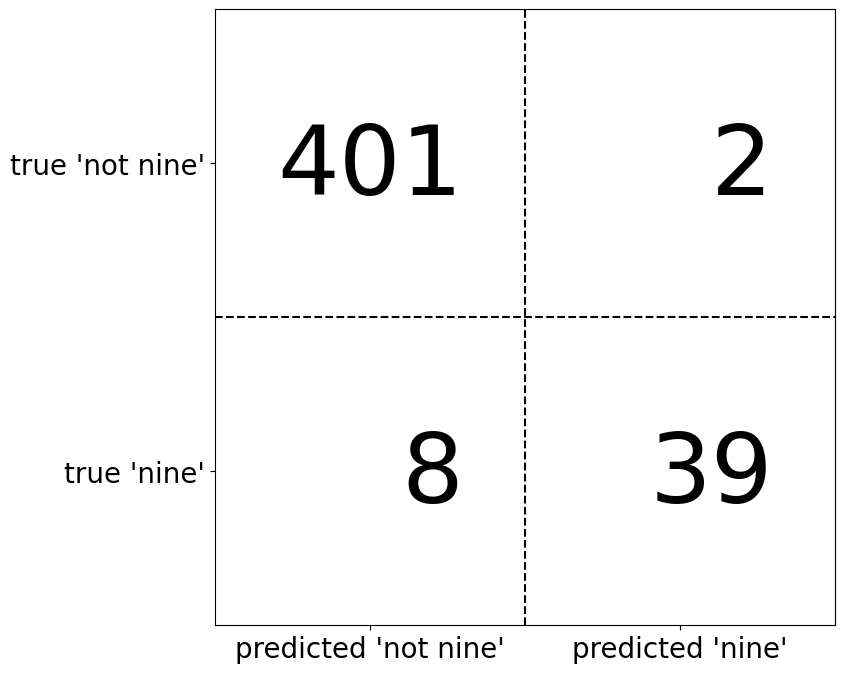

In [42]:
mglearn.plots.plot_confusion_matrix_illustration()

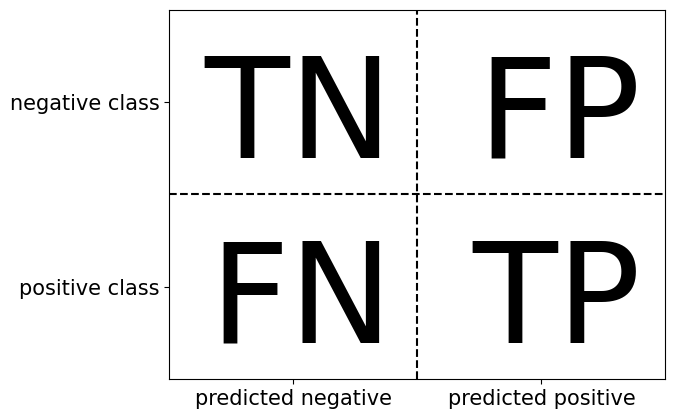

In [43]:
mglearn.plots.plot_binary_confusion_matrix()

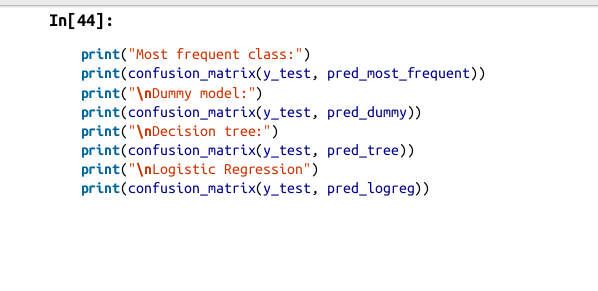

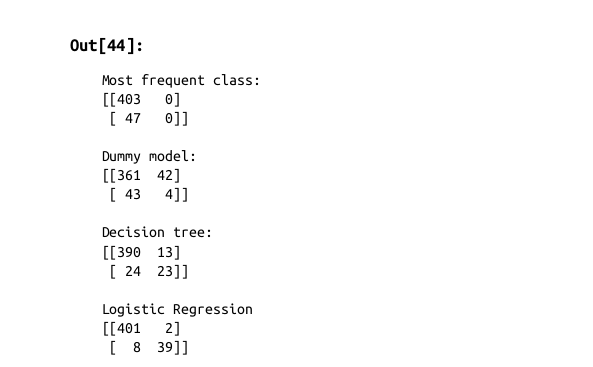

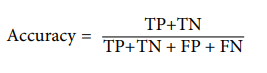

This shows how many of the results are actually the correct output among the whole output.

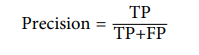

This shows how many of the results are actually positive among the positive outputs.

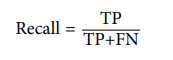

This shows how many real positive output we found among all positive values.

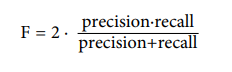

This shows the balance between precision and recall.

In [44]:
from sklearn.metrics import f1_score

print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))

print("f1 score dummy: {:.2f}".format(f1_score(y_test, prediction_dummy)))

print("f1 score tree: {:.2f}".format(f1_score(y_test, prediction_tree)))

print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, prediction_logistic_regression)))

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [46]:
print(classification_report(y_test, prediction_dummy,target_names=["not nine", "nine"]))


              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [47]:
print(classification_report(y_test, prediction_logistic_regression, target_names=["not nine", "nine"]))


              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [48]:
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50),
                  centers=[[-5, 0], [5, 0]],
                  cluster_std=[7.0, 2],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.5).fit(X_train, y_train)

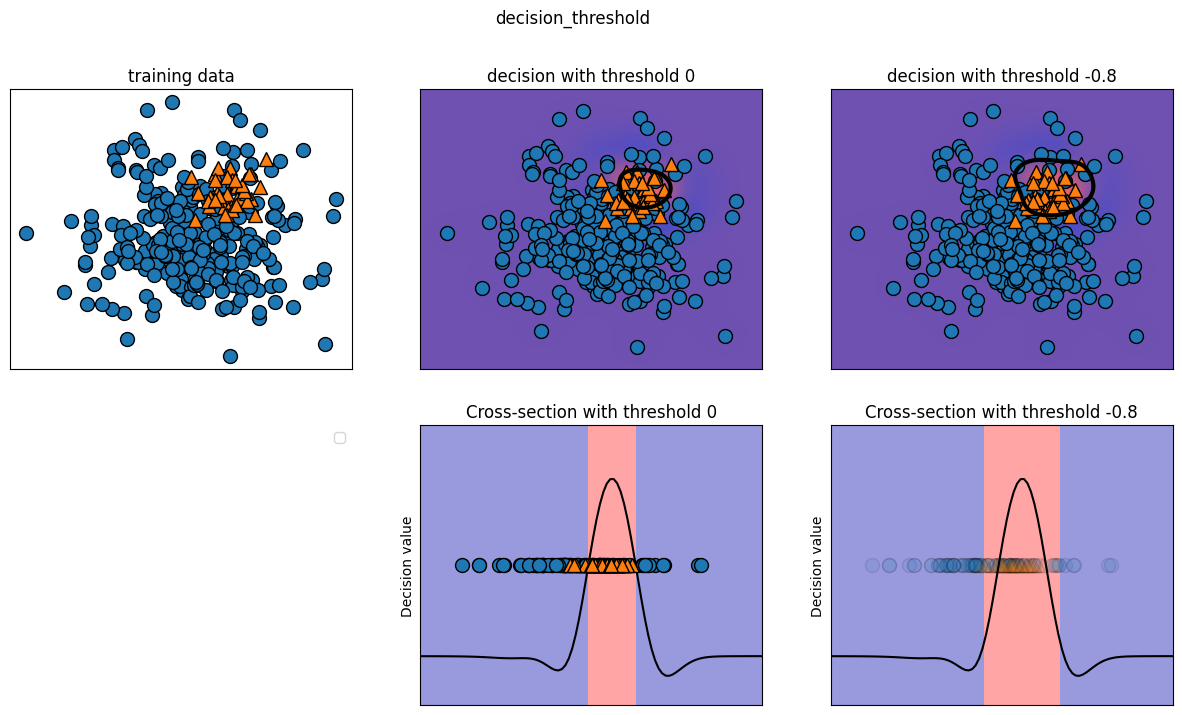

In [49]:
mglearn.plots.plot_decision_threshold()

In [50]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        96
           1       0.80      0.47      0.59        17

    accuracy                           0.90       113
   macro avg       0.86      0.72      0.77       113
weighted avg       0.90      0.90      0.89       113



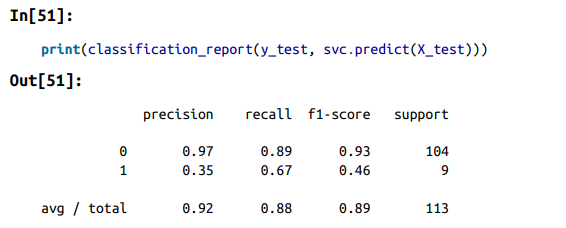

In [51]:
y_pred_lower_threshold = svc.decision_function(X_test) > -0.8

In [52]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        96
           1       0.75      0.71      0.73        17

    accuracy                           0.92       113
   macro avg       0.85      0.83      0.84       113
weighted avg       0.92      0.92      0.92       113



In [53]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

Text(0, 0.5, 'Recall')

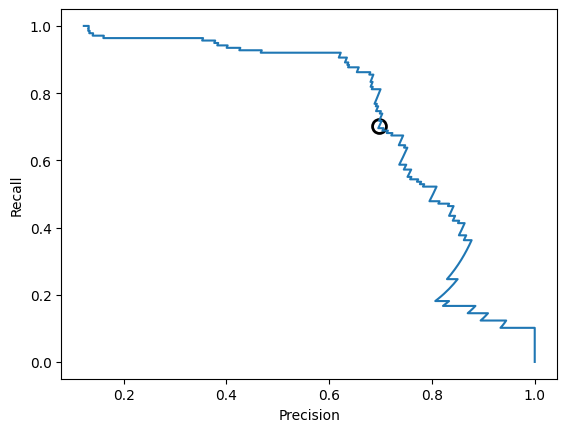

In [54]:
import matplotlib.pyplot as plt
# use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500),
                  centers=[[-5, 0], [5, 0]],
                  cluster_std=[7.0, 2],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=0.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closes to zero

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10, label="threshold zero",
         fillstyle="none", c="k", mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

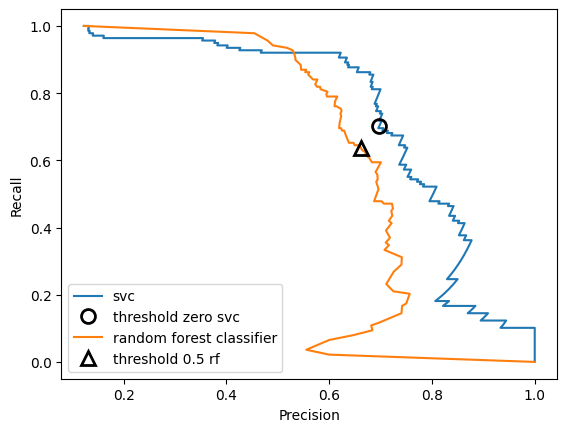

In [55]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
random_forest_classifier.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_random_forest, recall_random_forest, thresholds_random_forest = precision_recall_curve(
    y_test, random_forest_classifier.predict_proba(X_test)[:, 1]
)

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], "o", markersize=10, label="threshold zero svc",
         fillstyle="none", c="k", mew=2)

plt.plot(precision_random_forest, recall_random_forest, label="random forest classifier")

close_default_random_forest = np.argmin(np.abs(thresholds_random_forest - 0.5))
plt.plot(precision_random_forest[close_default_random_forest], recall_random_forest[close_default_random_forest], 
        '^', c='k', markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


In [56]:
print("f1_score of random forest: {:.3f}".format( f1_score(y_test, random_forest_classifier.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))


f1_score of random forest: 0.647
f1_score of svc: 0.700


In [57]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.645
Average precision of svc: 0.765


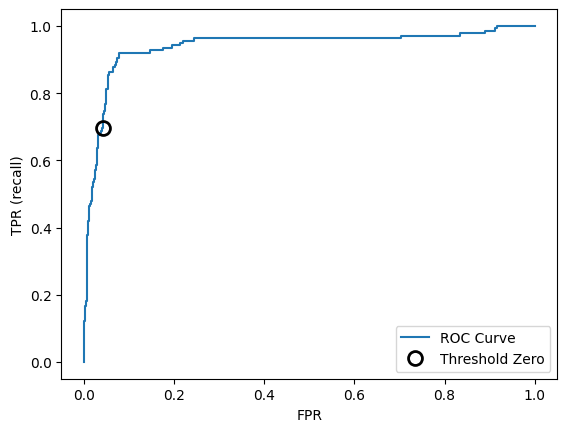

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, label="Threshold Zero",
        fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

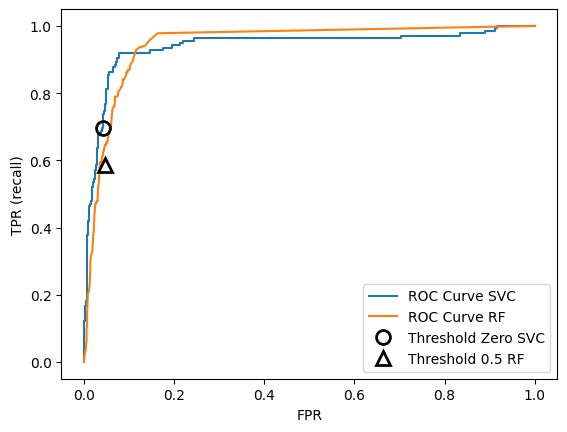

In [60]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize=10, label="Threshold Zero SVC", 
        fillstyle="none", c="k", mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], "^", markersize=10, label="Threshold 0.5 RF",
        fillstyle="none", c="k", mew=2)
plt.legend(loc=4)

In [61]:
print("f1 score of random forest: {:.3f}".format(f1_score(y_test, random_forest_classifier.predict(X_test))))

print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1 score of random forest: 0.647
f1_score of svc: 0.700


In [64]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.946
AUC for SVC: 0.940


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


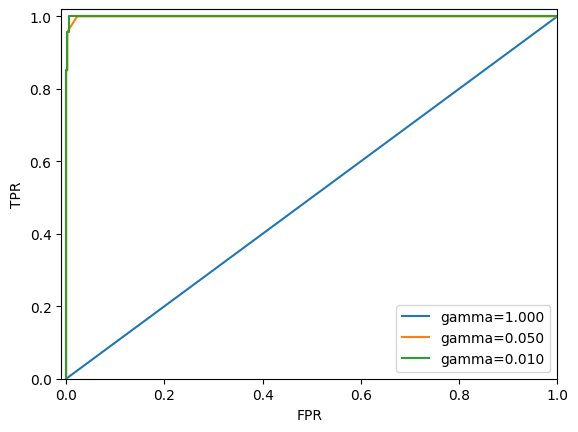

In [65]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
 svc = SVC(gamma=gamma).fit(X_train, y_train)
 accuracy = svc.score(X_test, y_test)
 auc = roc_auc_score(y_test, svc.decision_function(X_test))
 fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
 print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
 gamma, accuracy, auc))
 plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

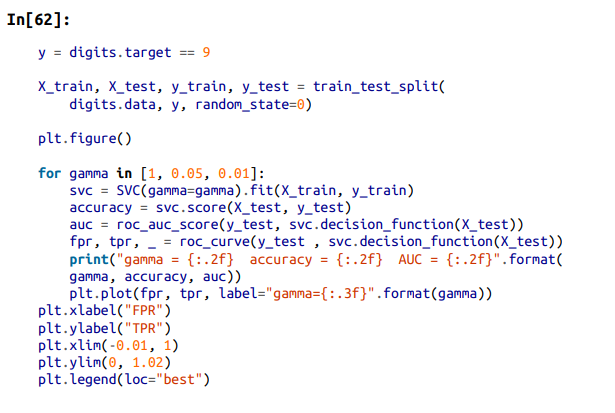

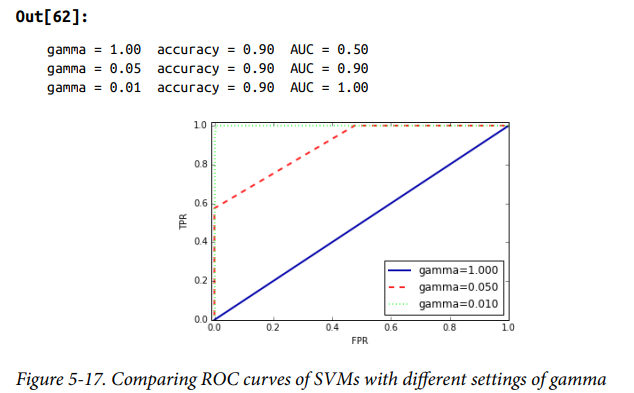

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix  # hem accuracy hem cm'yi import ettik

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))

# Burada artık confusion_matrix fonksiyonu çağrılıyor
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)


Accuracy: 0.953
Confusion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


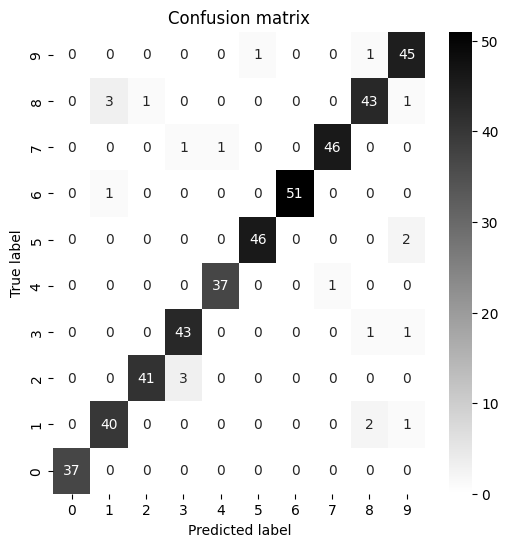

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm,
            annot=True,        # hücreleri yazdır
            fmt="d",           # tamsayı formatı
            cmap=plt.cm.gray_r,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
plt.show()


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [81]:
("Micro average f1 score: {:.3f}".format
 (f1_score(y_test, y_pred, average="micro")))
print("Macro average f1 score: {:.3f}".format
 (f1_score(y_test, y_pred, average="macro")))


Macro average f1 score: 0.954


In [82]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
 cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target == 9, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973
